In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

In [2]:
data = pd.read_csv("Cleaned Reddit Data AS.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.Title = data.Title.astype(str)
data.Content = data.Content.astype(str)
data.head()

,RID,Title,URL,Score,Comment_Score,Author,Content,Adult,Flair,Length_Title,Length_Content
0,g89s9t,Website find getting paid fairly comparing sal...,/r/india/comments/g89s9t/website_to_find_out_i...,2,0,ngranja19,nan,False,Business/Finance,84,0
1,g89rnl,Happy Akshaya Tritiya Akshaya Trititya 2020 Fe...,/r/india/comments/g89rnl/happy_akshaya_tritiya...,1,0,vaultuptechnologies,removed,False,AskIndia,74,7
2,g89ni7,A new turf war erupted Pakistan sponsored terr...,/r/india/comments/g89ni7/a_new_turf_war_has_er...,8,6,aviakki1,nan,False,Non-Political,166,0
3,g89j51,Special flights hospital beds Centre preps fly...,/r/india/comments/g89j51/special_flights_hospi...,13,6,silentr3b31,nan,False,Politics,75,0
4,g89iup,24 Vijayawada contract virus man hosts games h...,/r/india/comments/g89iup/24_in_vijayawada_cont...,65,8,drgnfly61,nan,False,Coronavirus,50,0


In [3]:
data.fillna("", inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21606 entries, 0 to 21605
Data columns (total 11 columns):
RID               21606 non-null object
Title             21606 non-null object
URL               21606 non-null object
Score             21606 non-null int64
Comment_Score     21606 non-null int64
Author            21606 non-null object
Content           21606 non-null object
Adult             21606 non-null bool
Flair             21606 non-null object
Length_Title      21606 non-null int64
Length_Content    21606 non-null int64
dtypes: bool(1), int64(4), object(6)
memory usage: 1.7+ MB


In [5]:
data['Flair'].unique()

array(['Business/Finance', 'AskIndia', 'Non-Political', 'Politics',
       'Coronavirus', 'Policy/Economy', 'Food', 'Science/Technology',
       'Photography', 'Scheduled', 'CAA-NRC-NPR', 'Sports'], dtype=object)

In [6]:
data.loc[data['Flair'] == 'Politics', 'Label'] = 0
data.loc[data['Flair'] == 'Non-Political', 'Label'] = 1
data.loc[data['Flair'] == 'Coronavirus', 'Label'] = 2
data.loc[data['Flair'] == 'AskIndia', 'Label'] = 3
data.loc[data['Flair'] == 'Policy/Economy', 'Label'] = 4
data.loc[data['Flair'] == 'Business/Finance', 'Label'] = 5
data.loc[data['Flair'] == 'AskIndia', 'Label'] = 6
data.loc[data['Flair'] == 'Photography', 'Label'] = 7
data.loc[data['Flair'] == 'CAA-NRC-NPR', 'Label'] = 8
data.loc[data['Flair'] == 'Scheduled', 'Label'] = 9
data.loc[data['Flair'] == 'Food', 'Label'] = 10
data.loc[data['Flair'] == 'Sports', 'Label'] = 11
data.loc[data['Flair'] == 'Science/Technology', 'Label'] = 12

In [7]:
data.head()

,RID,Title,URL,Score,Comment_Score,Author,Content,Adult,Flair,Length_Title,Length_Content,Label
0,g89s9t,Website find getting paid fairly comparing sal...,/r/india/comments/g89s9t/website_to_find_out_i...,2,0,ngranja19,nan,False,Business/Finance,84,0,5.0
1,g89rnl,Happy Akshaya Tritiya Akshaya Trititya 2020 Fe...,/r/india/comments/g89rnl/happy_akshaya_tritiya...,1,0,vaultuptechnologies,removed,False,AskIndia,74,7,6.0
2,g89ni7,A new turf war erupted Pakistan sponsored terr...,/r/india/comments/g89ni7/a_new_turf_war_has_er...,8,6,aviakki1,nan,False,Non-Political,166,0,1.0
3,g89j51,Special flights hospital beds Centre preps fly...,/r/india/comments/g89j51/special_flights_hospi...,13,6,silentr3b31,nan,False,Politics,75,0,0.0
4,g89iup,24 Vijayawada contract virus man hosts games h...,/r/india/comments/g89iup/24_in_vijayawada_cont...,65,8,drgnfly61,nan,False,Coronavirus,50,0,2.0


In [8]:
x = data['Title'] + data['Content'] + data['URL']
y = np.array(data['Label'])

In [9]:
vocab_size = 5000
embedding_dim = 64
max_length = 200

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 77671 unique tokens.


In [11]:
X = pad_sequences(sequences, maxlen=max_length, padding='post')

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [13]:
print((type(xtrain), type(ytrain), type(xtest), type(ytest)))

(<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>)


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(13,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 13)                845       
Total params: 395,149
Trainable params: 395,149
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
lstm_model = model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest), verbose=1)

Train on 17284 samples, validate on 4322 samples
Epoch 1/10
17284/17284 [==============================] - 84s 5ms/sample - loss: 1.6384 - accuracy: 0.4464 - val_loss: 1.4721 - val_accuracy: 0.5104
Epoch 2/10
17284/17284 [==============================] - 75s 4ms/sample - loss: 1.3146 - accuracy: 0.5731 - val_loss: 1.3800 - val_accuracy: 0.5366
Epoch 3/10
17284/17284 [==============================] - 76s 4ms/sample - loss: 1.1218 - accuracy: 0.6324 - val_loss: 1.4120 - val_accuracy: 0.5287
Epoch 4/10
17284/17284 [==============================] - 77s 4ms/sample - loss: 0.9837 - accuracy: 0.6773 - val_loss: 1.4402 - val_accuracy: 0.5275
Epoch 5/10
17284/17284 [==============================] - 78s 5ms/sample - loss: 0.8774 - accuracy: 0.7080 - val_loss: 1.5384 - val_accuracy: 0.5180
Epoch 6/10
17284/17284 [==============================] - 78s 5ms/sample - loss: 0.7919 - accuracy: 0.7321 - val_loss: 1.6155 - val_accuracy: 0.5139
Epoch 7/10
17284/17284 [==============================] -

In [17]:
def plot_graphs(lstm_model, string):
    plt.plot(lstm_model.history[string])
    plt.plot(lstm_model.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

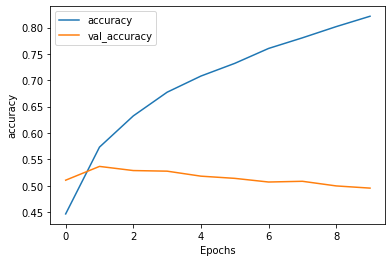

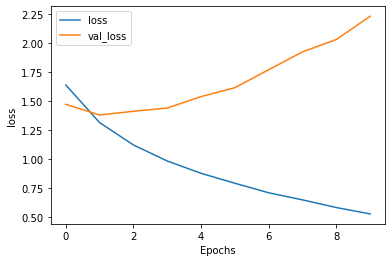

In [18]:
plot_graphs(lstm_model, "accuracy")
plot_graphs(lstm_model, "loss")